<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [58]:
import urllib.request

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite"
file_name = "m4_survey_data.sqlite"

urllib.request.urlretrieve(url, file_name)
print("Download complete.")


Download complete.


Connect to the database.


In [59]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [4]:
import pandas as pd

## Demo: How to run an sql query


In [5]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [6]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [7]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [8]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


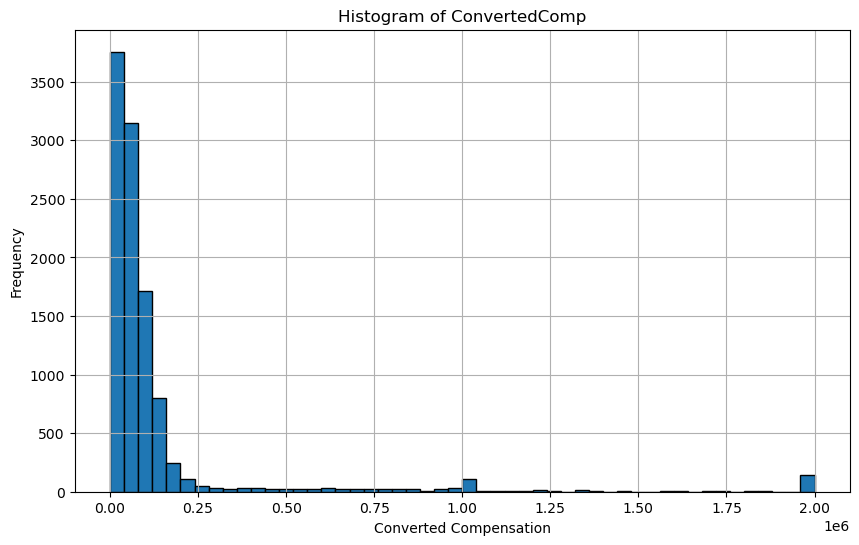

In [9]:
# your code goes here
import matplotlib.pyplot as plt

# Query to get the ConvertedComp column
query = "SELECT ConvertedComp FROM {}".format(table_name)

# Read the data into a DataFrame
df_comp = pd.read_sql_query(query, conn)

# Drop rows with NaN values in ConvertedComp
df_comp = df_comp.dropna(subset=['ConvertedComp'])

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df_comp['ConvertedComp'], bins=50, edgecolor='k')
plt.title('Histogram of ConvertedComp')
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Box Plots


Plot a box plot of `Age.`


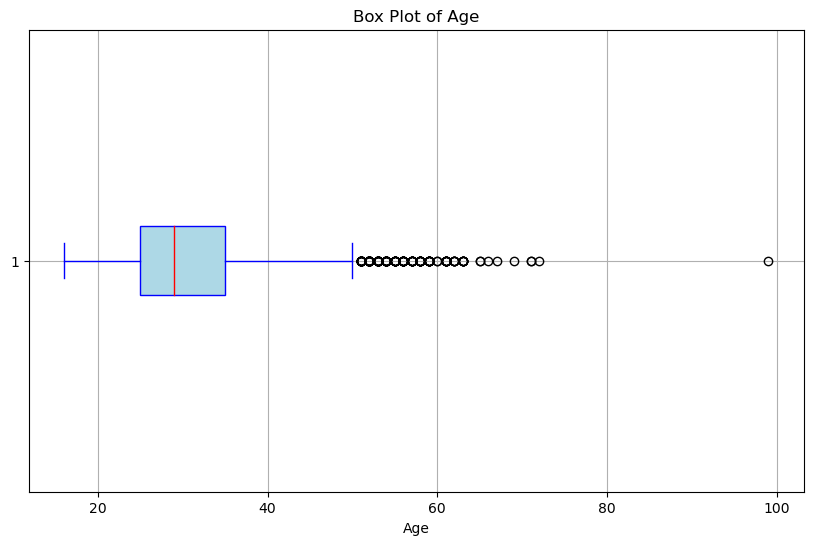

In [10]:
# your code goes here
# Query to get the Age column
query = "SELECT Age FROM master"

# Read the data into a DataFrame
df_age = pd.read_sql_query(query, conn)

# Drop rows with NaN values in Age
df_age = df_age.dropna(subset=['Age'])

# Plot the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df_age['Age'], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='blue'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'),
            medianprops=dict(color='red'))
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.grid(True)
plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


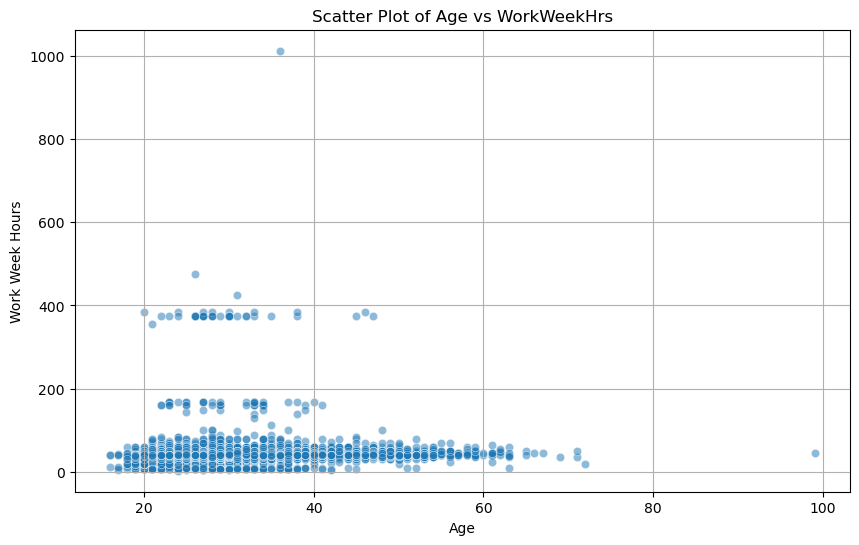

In [11]:
# your code goes here
# Query to get the Age and WorkWeekHrs columns
query = "SELECT Age, WorkWeekHrs FROM master"

# Read the data into a DataFrame
df = pd.read_sql_query(query, conn)

# Drop rows with NaN values in Age or WorkWeekHrs
df = df.dropna(subset=['Age', 'WorkWeekHrs'])

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['WorkWeekHrs'], alpha=0.5, edgecolors='w', linewidth=0.5)
plt.title('Scatter Plot of Age vs WorkWeekHrs')
plt.xlabel('Age')
plt.ylabel('Work Week Hours')
plt.grid(True)
plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


In [ ]:
# your code goes here
# Query to get the WorkWeekHrs, CodeRevHrs, and Age columns
query = "SELECT WorkWeekHrs, CodeRevHrs, Age FROM master"

# Read the data into a DataFrame
df = pd.read_sql_query(query, conn)

# Drop rows with NaN values in WorkWeekHrs, CodeRevHrs, or Age
df = df.dropna(subset=['WorkWeekHrs', 'CodeRevHrs', 'Age'])

# Plot the bubble plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['WorkWeekHrs'], df['CodeRevHrs'], 
                      s=df['Age'], alpha=0.5, edgecolors='w', linewidth=0.5)

plt.title('Bubble Plot of WorkWeekHrs vs CodeRevHrs (Size by Age)')
plt.xlabel('Work Week Hours')
plt.ylabel('Code Review Hours')
plt.grid(True)
plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


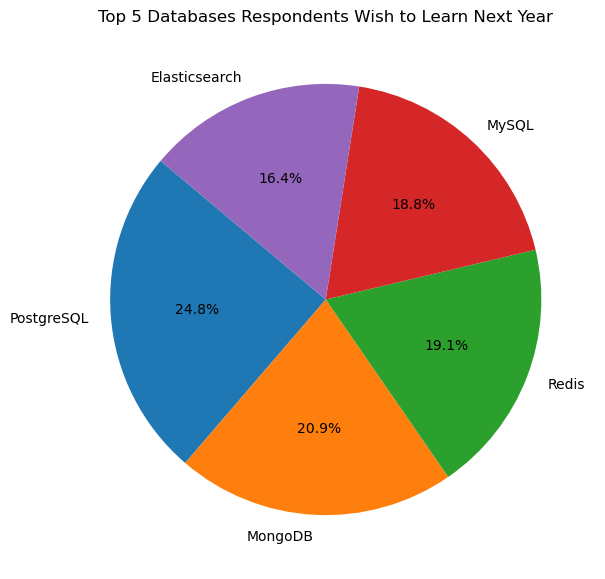

In [60]:
# Query to get the top 5 databases respondents wish to learn next year
query = """
SELECT *
FROM DatabaseDesireNextYear
"""

# Read the data into a DataFrame
df = pd.read_sql_query(query, conn)

# Count the occurrences of each database and get the top 5
top_databases = df['DatabaseDesireNextYear'].value_counts().head(5)

# Plot a pie chart
plt.figure(figsize=(10, 7))
top_databases.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Databases Respondents Wish to Learn Next Year')
plt.ylabel('')  # Remove the ylabel
plt.show()

In [63]:
# Define the SQL query to count the occurrences of each language respondents wish to learn next year
query_languages = """
SELECT LanguageDesireNextYear, COUNT(*) AS Count
FROM LanguageDesireNextYear
WHERE LanguageDesireNextYear IS NOT NULL
GROUP BY LanguageDesireNextYear
ORDER BY Count DESC;
"""

# Execute the query and read the data into a DataFrame
languages_data = pd.read_sql_query(query_languages, conn)

# Find the rank of Python in the sorted list
python_rank = languages_data[languages_data['LanguageDesireNextYear'] == 'Python'].index[0] + 1

print("Rank of Python among the most popular languages respondents wish to learn next year:", python_rank)


Rank of Python among the most popular languages respondents wish to learn next year: 3


In [65]:
# Define the SQL query to count the number of respondents who indicated they currently work with 'SQL'
query_sql_count = """
SELECT COUNT(*) AS SqlRespondents
FROM LanguageWorkedWith
WHERE LanguageWorkedWith LIKE '%SQL%';
"""

# Execute the query and read the result
sql_count_result = pd.read_sql_query(query_sql_count, conn)

# Display the count of respondents who indicated they currently work with 'SQL'
print("Number of respondents who indicated they currently work with 'SQL':", sql_count_result['SqlRespondents'][0])

Number of respondents who indicated they currently work with 'SQL': 7106


In [78]:
# Define the SQL query to count the number of respondents who work with 'MySQL' and don't work with any other language
query_mysql_only_count = """
SELECT COUNT(*) AS MySqlOnlyRespondents
FROM LanguageWorkedWith
WHERE LanguageWorkedWith = 'MySQL';
"""

# Execute the query and read the result
mysql_only_count_result = pd.read_sql_query(query_mysql_only_count, conn)

# Display the count of respondents who work on 'MySQL' only
print("Number of respondents who indicated they work on 'MySQL' only:", mysql_only_count_result['MySqlOnlyRespondents'][0])


Number of respondents who indicated they work on 'MySQL' only: 0


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


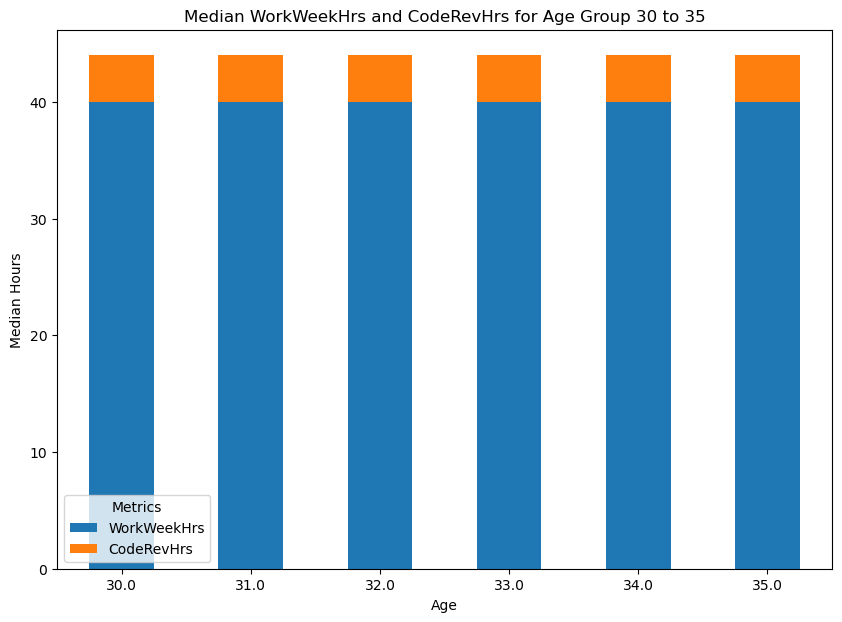

In [53]:
# SQL query to retrieve data
query = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
WHERE Age >= 30 AND Age <= 35;
"""

# Read the data into a DataFrame
filtered_data = pd.read_sql_query(query, conn)
# Group the filtered data by 'Age'
grouped_data = filtered_data.groupby('Age').median()

# Create a stacked bar chart
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Median WorkWeekHrs and CodeRevHrs for Age Group 30 to 35')
plt.xlabel('Age')
plt.ylabel('Median Hours')
plt.xticks(rotation=0)
plt.legend(['WorkWeekHrs', 'CodeRevHrs'], title='Metrics')
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


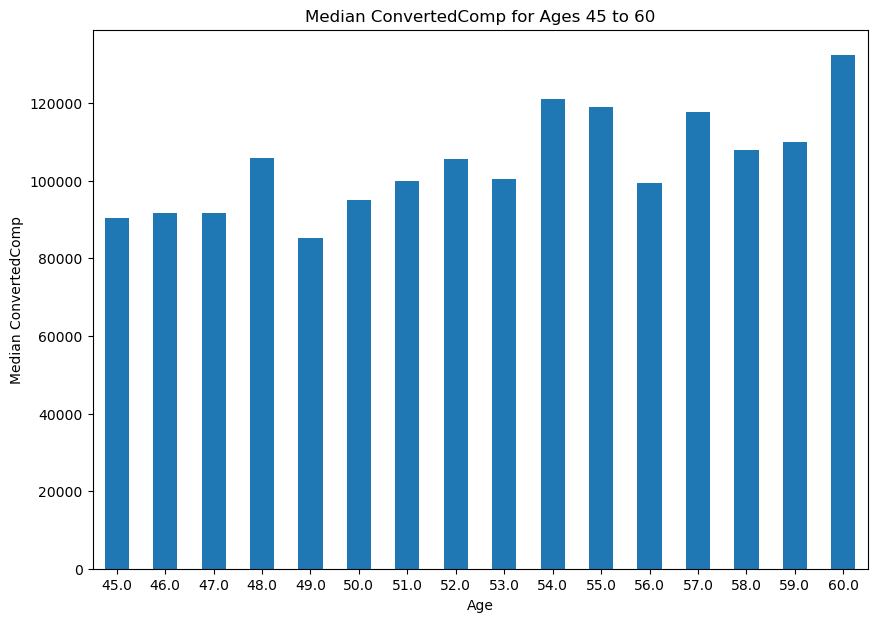

In [54]:
# Define the SQL query
query = """
SELECT Age, ConvertedComp
FROM master
WHERE Age >= 45 AND Age <= 60;
"""

# Execute the query and read the data into a DataFrame
df = pd.read_sql_query(query, conn)

# Group the filtered data by 'Age'
grouped_data = df.groupby('Age')

# Calculate the median for each age group
m_data = grouped_data['ConvertedComp'].median()

# Plot the median ConvertedComp for ages 45 to 60
m_data.plot(kind='bar', figsize=(10, 7))
plt.title('Median ConvertedComp for Ages 45 to 60')
plt.xlabel('Age')
plt.ylabel('Median ConvertedComp')
plt.xticks(rotation=0)
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


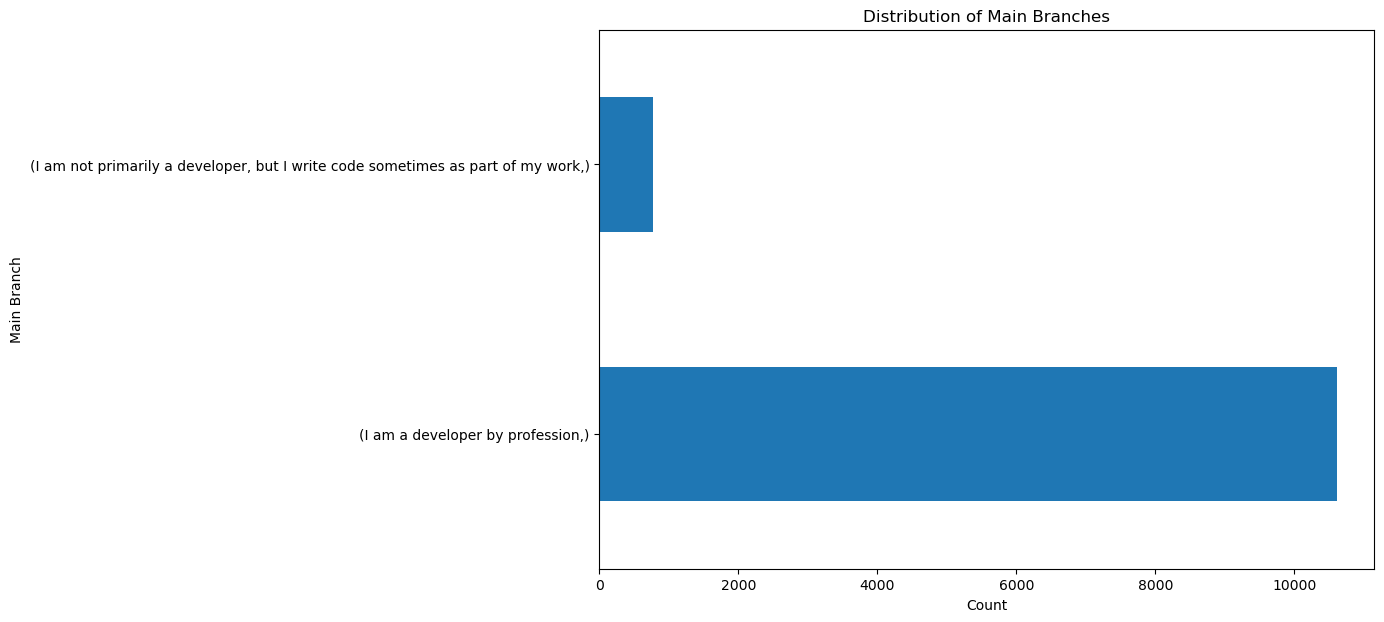

In [55]:
# Define the SQL query
query_main_branch = """
SELECT MainBranch
FROM master;
"""

# Execute the query and read the data into a DataFrame
main_branch_data = pd.read_sql_query(query_main_branch, conn)

# Count the occurrences of each value in the 'MainBranch' column
branch_counts = main_branch_data.value_counts()

# Plot a horizontal bar chart
branch_counts.plot(kind='barh', figsize=(10, 7))
plt.title('Distribution of Main Branches')
plt.xlabel('Count')
plt.ylabel('Main Branch')
plt.show()

In [81]:
# Query to count the occurrences of each DevType
query_devtype_count = """
SELECT DevType, COUNT(*) AS Count
FROM DevType
GROUP BY DevType
ORDER BY Count DESC
LIMIT 1;
"""

# Execute the query and read the result into a DataFrame
devtype_count_df = pd.read_sql_query(query_devtype_count, conn)

# Display the result
print("Majority of the survey responders are:", devtype_count_df['DevType'].iloc[0])


Majority of the survey responders are: Developer, full-stack


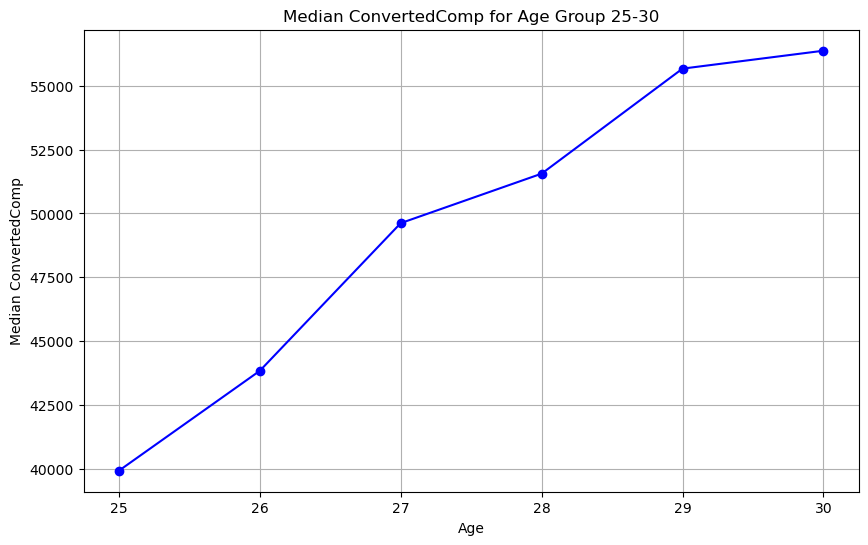

In [80]:
# Execute the query to get the data
query_data = """
SELECT Age, ConvertedComp
FROM master
WHERE Age BETWEEN 25 AND 30;
"""

# Read the data into a DataFrame
data_df = pd.read_sql_query(query_data, conn)

# Calculate the median ConvertedComp for each age
median_comp_df = data_df.groupby('Age')['ConvertedComp'].median().reset_index()

# Create a line chart of Age and median ConvertedComp
plt.figure(figsize=(10, 6))
plt.plot(median_comp_df['Age'], median_comp_df['ConvertedComp'], marker='o', color='b', linestyle='-')
plt.title('Median ConvertedComp for Age Group 25-30')
plt.xlabel('Age')
plt.ylabel('Median ConvertedComp')
plt.grid(True)
plt.show()


Close the database connection.


In [56]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
